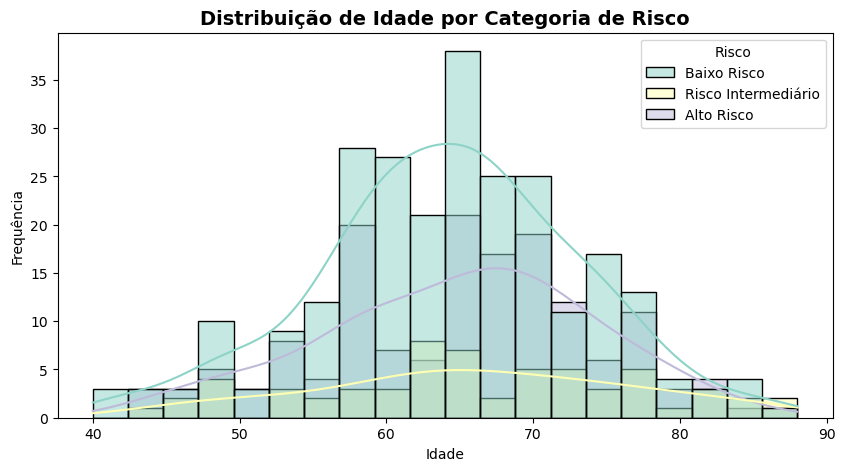

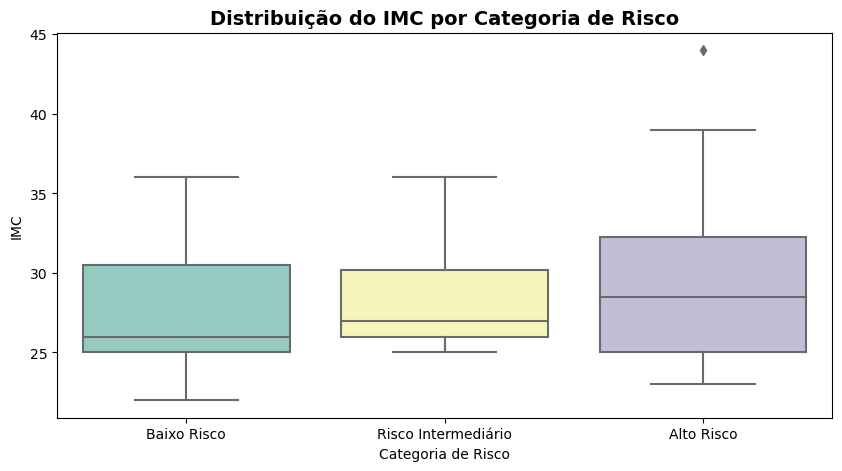

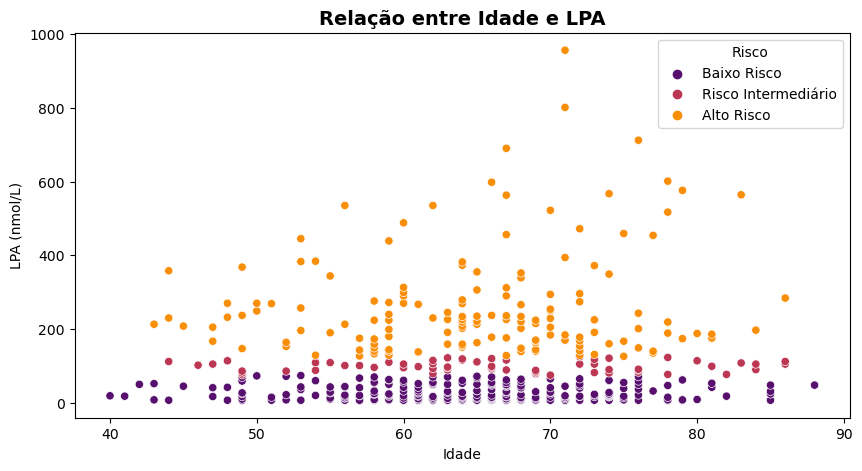

<Figure size 1200x600 with 0 Axes>

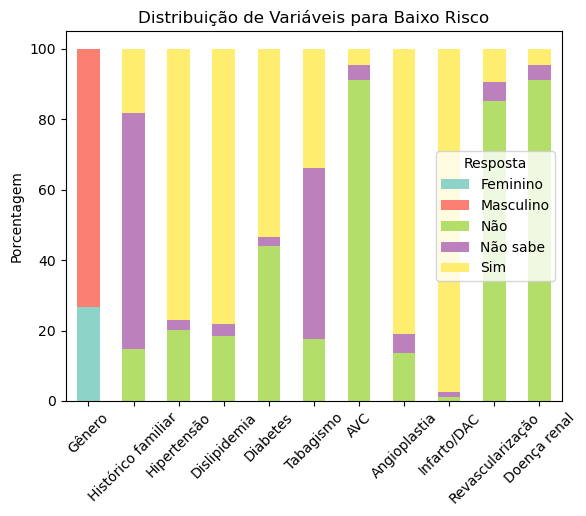

<Figure size 1200x600 with 0 Axes>

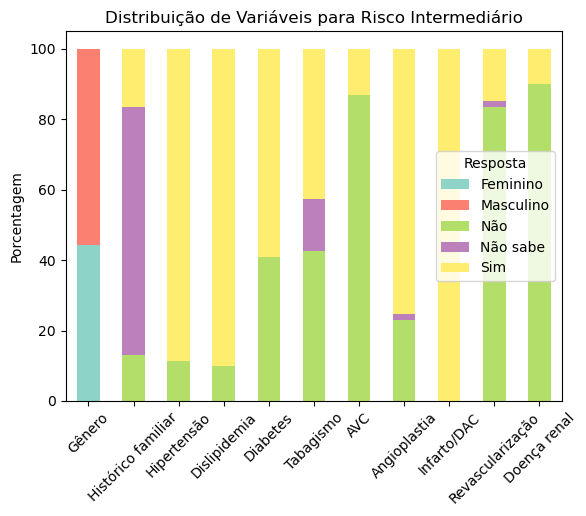

<Figure size 1200x600 with 0 Axes>

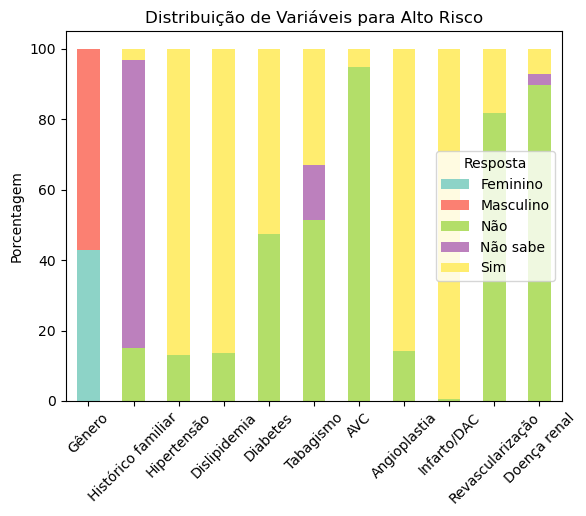

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("pdlpa.csv")

# Carregar os dados
df = pd.read_csv("pdlpa.csv")

# Definir categorias de risco com base na coluna LPA
def categorize_risk(lpa):
    if lpa < 75:
        return "Baixo Risco"
    elif 75 <= lpa <= 125:
        return "Risco Intermediário"
    else:
        return "Alto Risco"

# Criar a coluna "Risco" no DataFrame
df["Risco"] = df["LPA"].apply(categorize_risk)

# Converter colunas numéricas
df["IMC"] = pd.to_numeric(df["IMC"], errors="coerce")
df["Idade"] = pd.to_numeric(df["Idade"], errors="coerce")
df["LPA"] = pd.to_numeric(df["LPA"], errors="coerce")

# 🔹 Gráfico 1: Histograma de Idade por Categoria de Risco
plt.figure(figsize=(10,5))
sns.histplot(df, x="Idade", hue="Risco", bins=20, kde=True, palette="Set3")
plt.title("Distribuição de Idade por Categoria de Risco", fontsize=14, fontweight="bold")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.savefig("grafico_histograma_idade.png", dpi=300, bbox_inches="tight")
plt.show()

# 🔹 Gráfico 2: Boxplot de IMC por Categoria de Risco
plt.figure(figsize=(10,5))
sns.boxplot(x="Risco", y="IMC", data=df, palette="Set3")
plt.title("Distribuição do IMC por Categoria de Risco", fontsize=14, fontweight="bold")
plt.xlabel("Categoria de Risco")
plt.ylabel("IMC")
plt.savefig("grafico_boxplot_imc.png", dpi=300, bbox_inches="tight")
plt.show()

# 🔹 Gráfico 3: Scatterplot (LPA x Idade)
plt.figure(figsize=(10,5))
sns.scatterplot(x="Idade", y="LPA", hue="Risco", data=df, palette="inferno")
plt.title("Relação entre Idade e LPA", fontsize=14, fontweight="bold")
plt.xlabel("Idade")
plt.ylabel("LPA (nmol/L)")
plt.savefig("grafico_scatterplot_lpa_idade.png", dpi=300, bbox_inches="tight")
plt.show()

# Função para categorizar variáveis de saúde
def categorize_variable(value):
    if value == "S":
        return "Sim"
    elif value == "N":
        return "Não"
    elif pd.isna(value) or value.strip() in ["-", ""]:
        return "Não sabe"
    elif len(str(value)) > 2:
        return "Não sabe"
    return value

# Aplicar a função para todas as variáveis categóricas
categorical_columns = ["Gênero", "Histórico familiar", "Hipertensão", "Dislipidemia", "Diabetes", 
                        "Tabagismo", "AVC", "Angioplastia", "Infarto/DAC", "Revascularização", "Doença renal"]
for col in categorical_columns:
    df[col] = df[col].apply(categorize_variable)

# Criar gráficos para cada categoria de risco
df = df[df["Gênero"].isin(["M", "F"])]  # Remove qualquer entrada diferente
df["Gênero"] = df["Gênero"].map({"F": "Feminino", "M": "Masculino"})  # Ajusta os rótulos corretamente
df["Revascularização"] = df["Revascularização"].str.strip()  # Remove espaços extras
df["Revascularização"] = df["Revascularização"].replace("N", "Não")  # Troca "N" por "Não"

for risk_category in ["Baixo Risco", "Risco Intermediário", "Alto Risco"]:
    subset = df[df["Risco"] == risk_category]
    subset = subset[subset["Gênero"].isin(["Feminino", "Masculino"])]  # Filtra apenas os valores certos

    plt.figure(figsize=(12,6))

    # Contar porcentagens das variáveis
    risk_percentages = subset[categorical_columns].apply(lambda x: x.value_counts(normalize=True) * 100)

    # Plotar gráfico de barras empilhadas
    risk_percentages.T.plot(kind="bar", stacked=True, colormap="Set3")
    plt.title(f"Distribuição de Variáveis para {risk_category}")
    plt.ylabel("Porcentagem")
    plt.legend(title="Resposta", loc="center right")
    plt.xticks(rotation=45)
    plt.savefig(f"grafico_{risk_category}.png", dpi=300, bbox_inches="tight")
    plt.show()